In [18]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from run import run_experiment_ellipsoids

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
dists, res = run_experiment_ellipsoids(n_pairs=1000)

Running benchmark on 1000 pairs of Ellipsoids...
Dist: -0.1m | GJK Avg: 5.82 | Nest Avg: 4.36
Dist: -0.01m | GJK Avg: 7.26 | Nest Avg: 4.62
Dist: 0.0m | GJK Avg: 6.87 | Nest Avg: 3.44
Dist: 0.001m | GJK Avg: 7.73 | Nest Avg: 5.13
Dist: 0.01m | GJK Avg: 7.71 | Nest Avg: 5.08
Dist: 0.1m | GJK Avg: 7.12 | Nest Avg: 4.86
Dist: 1.0m | GJK Avg: 4.52 | Nest Avg: 4.12


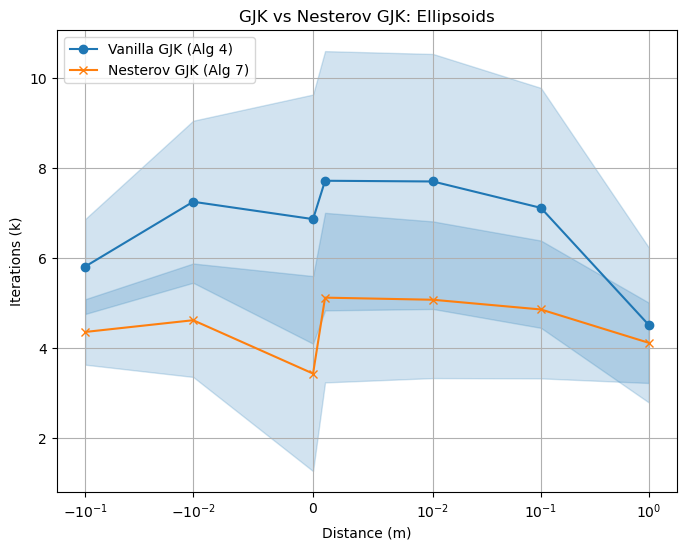

In [20]:
# Plotting (Replicating Fig 5a [cite: 546])
plt.figure(figsize=(8, 6))

plt.fill_between(
    dists, 
    res["mean_iters_gjk"] - res["std_iters_gjk"], # Lower bound
    res["mean_iters_gjk"] + res["std_iters_gjk"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:blue" # Match the line color
)
plt.plot(dists, res["mean_iters_gjk"], marker="o", label="Vanilla GJK (Alg 4)")

plt.fill_between(
    dists, 
    res["mean_iters_nesterov"] - res["std_iters_nesterov"], # Lower bound
    res["mean_iters_nesterov"] + res["std_iters_nesterov"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:blue" # Match the line color
)
plt.plot(
    dists, res["mean_iters_nesterov"], marker="x", label="Nesterov GJK (Alg 7)"
)
plt.xscale("symlog", linthresh=0.01)  # Log scale x-axis as used in paper figures
plt.xlabel("Distance (m)")
plt.ylabel("Iterations (k)")
plt.title("GJK vs Nesterov GJK: Ellipsoids")
plt.grid(True, which="both", ls="-")
plt.legend()

plt.show()


In [14]:
index_ellipsoid = 11

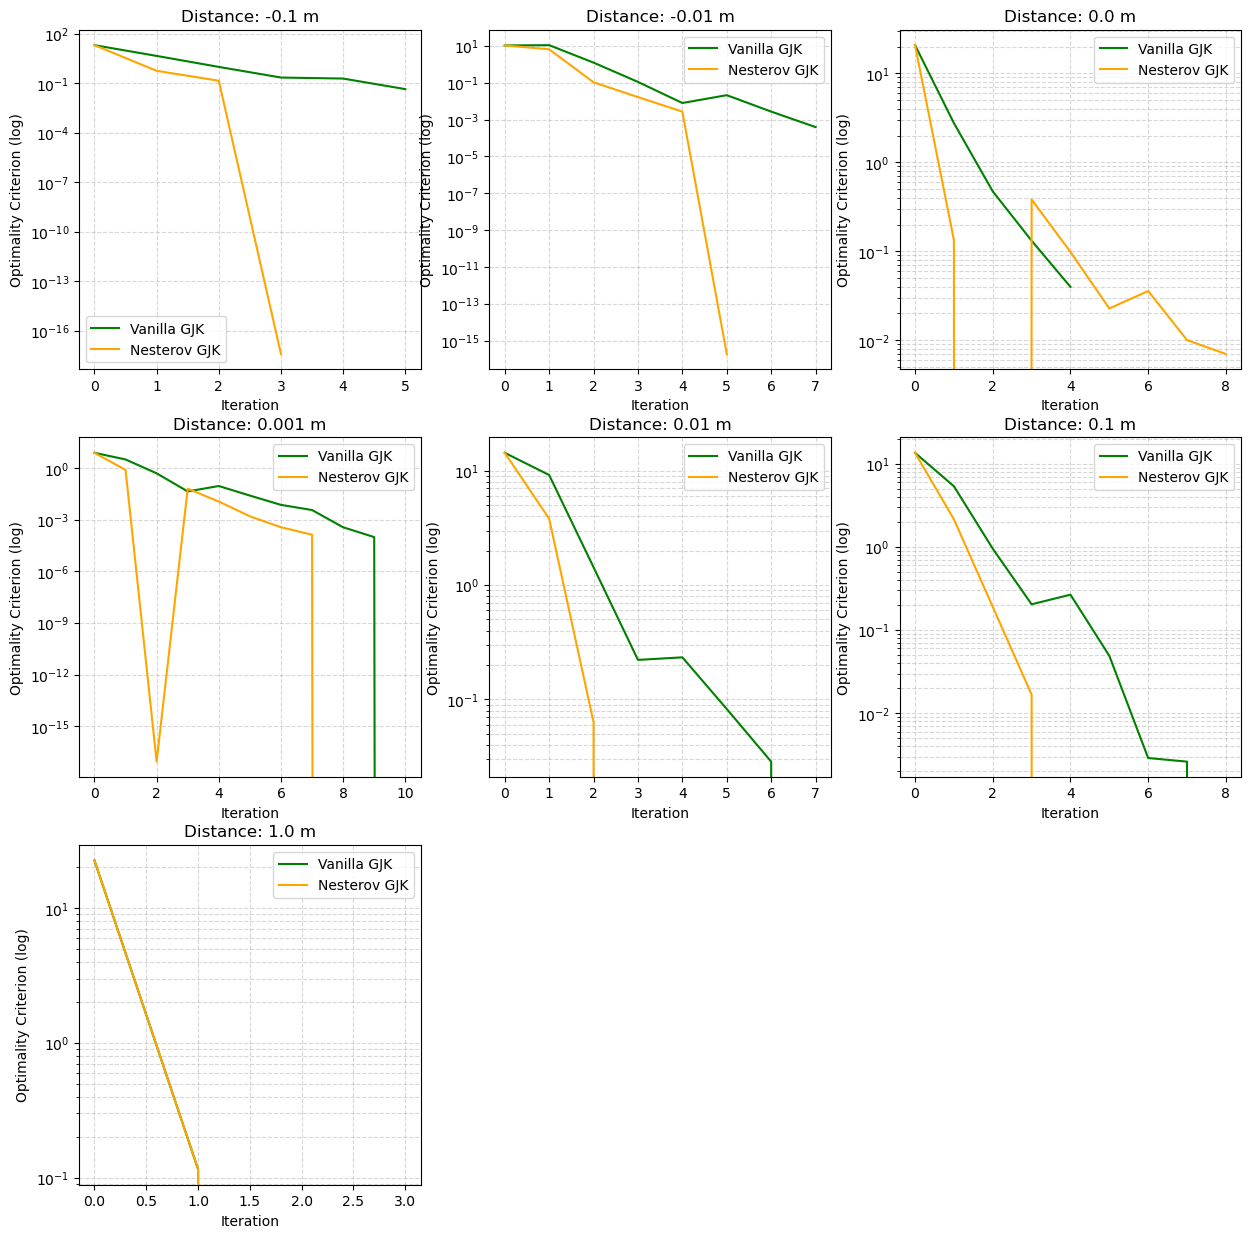

In [15]:
n_plots = len(dists)
n_cols = 3
# Calculate required rows: ceil(n_plots / n_cols)
n_rows = (n_plots + n_cols - 1) // n_cols

# Create a large figure to hold all subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy iteration

for i, d in enumerate(dists):
    ax = axes[i]

    # Extract the mean trajectory arrays
    # We add a tiny epsilon (1e-15) to avoid log(0) errors if the error hits exactly zero
    gjk_curve = res["iters_opt_criterions_gjk"][i][index_ellipsoid] 
    nest_curve = res["iters_opt_criterions_nesterov"][i][index_ellipsoid] 

    # Plot curves
    ax.plot(gjk_curve, label="Vanilla GJK", color="green", linewidth=1.5)
    ax.plot(nest_curve, label="Nesterov GJK", color="orange", linewidth=1.5)

    # Formatting
    ax.set_title(f"Distance: {d} m")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Optimality Criterion (log)")
    ax.set_yscale("log")
    ax.grid(True, which="both", ls="--", alpha=0.5)
    ax.legend()

# Hide any unused subplots (if n_plots is not a multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.show()
